# Collaborative Item-based Recommender

## part 1

In [ ]:
#1.	Import the libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import random

In [ ]:
#2.	Load the dataset into a dataframe
ratings=pd.read_csv("/content/ccai422_lab04_part1_data.csv", index_col='Unnamed: 0')
ratings.head(5)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [ ]:
#3.	Exploration: Describe the read the data
# The total number of data points
print('The number of data points in this dataset: ' + str(len(ratings)))

# The number of items (i.e. movies) in the dataset
print('The number of items (i.e. movies) in the dataset: ' + str(ratings['movie_id'].nunique()))

# The number of users in the dataset
print('The number of users in the dataset: ' + str(ratings['user_id'].nunique()))

# The average ratings per user
ratings_per_users = ratings.groupby('user_id').count()
print('The average ratings per user: '+ str(round(ratings_per_users.mean()[0],2)))

# The number of ratings/user
print('The below table shows the number of ratings per user\n')
print(ratings_per_users)


The number of data points in this dataset: 100000
The number of items (i.e. movies) in the dataset: 1682
The number of users in the dataset: 943
The average ratings per user: 106.04
The below table shows the number of ratings per user

         movie_id  rating
user_id                  
1             272     272
2              62      62
3              54      54
4              24      24
5             175     175
...           ...     ...
939            49      49
940           107     107
941            22      22
942            79      79
943           168     168

[943 rows x 2 columns]


<ipython-input-3-8d0cbbcefae4>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The average ratings per user: '+ str(round(ratings_per_users.mean()[0],2)))


In [ ]:
#4.	Preparation: Rating matrix
#Build the ratings matrix using pivot_table function
ratings = ratings.pivot_table(values='rating', index='user_id', columns='movie_id')

#Before starting computations, copy the original ratings into a dummy ratings matrix which will have all null values imputed to zeros
cos_matrix_dummy = ratings.copy()

# rename the axis of the new matrix
cos_matrix_dummy = cos_matrix_dummy.rename_axis('user_id', axis=1).rename_axis(None, axis=0)

In [ ]:
#5.	Similarity: Center the data around the mean
# Compute the mean rating per user
cos_matrix_dummy['mean'] = cos_matrix_dummy.mean(axis=1)

# Substract the mean from each item
cos_matrix_dummy.loc[:, cos_matrix_dummy.columns != 'mean'] = cos_matrix_dummy.loc[:, cos_matrix_dummy.columns != 'mean'] - cos_matrix_dummy['mean'].values[:, None]

#Drop the newly added mean column from the data
cos_matrix_dummy.drop(columns='mean', inplace=True)

#Display the data centred around the mean
cos_matrix_dummy.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,1.389706,-0.610294,0.389706,-0.610294,-0.610294,1.389706,0.389706,-2.610294,1.389706,-0.610294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.290323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.709677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.125714,0.125714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#6.	Similarity: Compute cosine similarity
# Fill NaN values with zeros
cos_matrix_dummy.fillna(0,inplace=True)

# Compute the cosine similarity. Notice we take the transpose to compute the similarity between the items
cos_matrix_dummy_sim = cosine_similarity(cos_matrix_dummy.T)

# Build dataframe based on the similarity value. Note that the type of r_matrix_dummy_sim is numpy array
cos_matrix_dummy_sim = pd.DataFrame(cos_matrix_dummy_sim, columns =  list(cos_matrix_dummy.T.index), index=list(cos_matrix_dummy.T.index))

display(cos_matrix_dummy_sim)


,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,1.000000,-0.058367,-0.065560,-0.039649,0.011691,0.027294,0.074627,0.127370,0.038487,0.004889,...,0.060065,0.0,0.000000,0.000000,0.011100,0.0,0.0,0.0,0.053377,-0.033203
2,-0.058367,1.000000,0.033551,0.031268,0.013884,-0.010781,-0.054500,-0.008301,-0.105092,-0.020407,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.001926,0.036452
3,-0.065560,0.033551,1.000000,-0.117538,0.013721,0.053766,-0.088374,-0.150728,-0.067389,-0.049810,...,0.000000,0.0,0.000000,0.000000,0.200920,0.0,0.0,0.0,0.000000,0.033238
4,-0.039649,0.031268,-0.117538,1.000000,-0.150014,-0.023626,0.004446,0.110419,0.027818,0.010657,...,0.000000,0.0,-0.114405,-0.114405,0.089998,0.0,0.0,0.0,0.001436,-0.047084
5,0.011691,0.013884,0.013721,-0.150014,1.000000,-0.041925,-0.045006,0.011713,-0.062400,-0.032335,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.045630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1681,0.053377,0.001926,0.000000,0.001436,0.000000,0.000000,0.053099,0.132070,0.057320,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000


In [ ]:
#7.	Prediction: Select the ratings data for a random user
# Optionally set a seed
random.seed(3)

# Select random user
random_user = random.randrange(len(ratings))
print('random user ID is {}'.format(random_user))

# Retrieve ratings data for the randomly selected user
random_user_ratings = ratings[ratings.index == random_user]


random user ID is 243


In [ ]:
#8.	Prediction: Randomly, select unrated item for the randomly selected user
# Retrieve unrated item for that the randomly selected user
unrated_items_for_random_user = random_user_ratings.columns[random_user_ratings.isnull().all(0)]

# Randomly select an unrated item whose rating will be predicted using item-based methods
random_unrated_item = random.choice(list(unrated_items_for_random_user))
print('Item {} is unrated by user {}'.format(random_unrated_item,random_user))


Item 1292 is unrated by user 243


In [ ]:
#9.	Prediction: Select the top n similar items to the randomly selected unrated item
# Retrieve all the items rated by the randomly selected user
rated_items_for_random_user = random_user_ratings.columns[random_user_ratings.notnull().all(0)]

# Show the similarity matrix between the randomly selected unrated item and rated items of the randomly selected user
filtered_col_sim = list(rated_items_for_random_user)
filtered_col_sim.append(random_unrated_item)
rated_unrated_sim_random_user = cos_matrix_dummy_sim.loc[cos_matrix_dummy_sim.columns.isin(filtered_col_sim)]

# Of those items find the top n neighbors to the randomely selected unrated item
topn = rated_unrated_sim_random_user.nlargest(3,random_unrated_item).index.tolist()[1:]

# Retrieve the ratings that the top neighbor items gave to the unrated item
neighbors_item_ratings_random_item = random_user_ratings.loc[:,topn]

# Get the similarity values for the top n similar items
neighbors_sim = rated_unrated_sim_random_user [[random_unrated_item]].nlargest(3,random_unrated_item)[1:]
print("The top neighbors for the item {} that is unrated by user {} are the items: {}".format(random_unrated_item,random_user,topn))
print("The ratings for the top {} neigbors items are: {}".format(len(topn), *neighbors_item_ratings_random_item.values))
print("The cosine similarities between item {} and items: {} are: {}".format(random_unrated_item, topn, neighbors_sim.values))


The top neighbors for the item 1292 that is unrated by user 243 are the items: [387, 737]
The ratings for the top 2 neigbors items are: [4. 3.]
The cosine similarities between item 1292 and items: [387, 737] are: [[0.21278472]
 [0.17271305]]


In [ ]:
#10.	Prediction: predict the rating of the randomly selected item
# Apply the formula
predicted_value_for_unrated_item = (neighbors_sim.T.dot(neighbors_item_ratings_random_item.T).values[0] / neighbors_sim.sum())
predicted_value_for_unrated_item


,0
1292,3.551974


## Part 2

In [ ]:
#1.	Download the dataset file that is provided on the Blackboard and browse its content
#2.	[0.5 mark] Read the data into a dataframe
df=pd.read_csv("/content/ccai422_lab04_part2_3_data.csv", index_col='Unnamed: 0')
df.head(5)

,Alice,User1,User2,User3,User4
item1,5.0,3,4,3,1
item2,3.0,1,3,3,5
item3,4.0,2,4,1,5
item4,4.0,3,3,5,2
item5,NaN,3,5,4,1


## Applying cosine similarity using sklearn
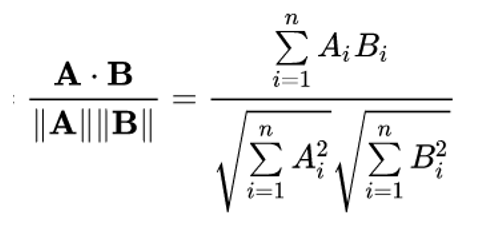

In [ ]:
# Step 2: Apply cosine similarity to compute similarity between items
cosine_sim = cosine_similarity(df.fillna(0).T)  # Fill NaN with 0 for cosine similarity and transpose to get item-item similarity

# Convert the similarity matrix into a DataFrame for easy handling
#cosine_sim_df =pd.DataFrame(cosine_sim, index=df.columns, columns=df.columns) # This line incorrectly uses df.columns for both the index and columns.
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index) # Use df.index instead to set the index and columns to the item names.

In [ ]:
# Step 3: Select Alice and the item to predict (item5)
user = 'Alice'
item_to_predict = 'item5'
# Step 4: Get the cosine similarity values for item5 and select the top 2 similar items
similarities = cosine_sim_df[item_to_predict].drop(item_to_predict)  # Drop self-similarity

top_2_neighbors = similarities.nlargest(2)  # Get top 2 similar items

In [ ]:
# Step 5: Compute the predicted rating for item5 using the formula
numerator = 0
denominator = 0
for neighbor_item, similarity in top_2_neighbors.items():
    rating = df.loc[neighbor_item, user]
    numerator += similarity * rating
    denominator += abs(similarity)

predicted_rating = numerator / denominator if denominator != 0 else 0

# Output the predicted rating
print(f"Predicted rating for {user} on {item_to_predict}: {predicted_rating:.2f}")

Predicted rating for Alice on item5: 4.51


## Part 3

In [ ]:
# Step 1: Define a function to compute cosine similarity manually
def cosine_similarity_manual(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2) if norm_vec1 != 0 and norm_vec2 != 0 else 0


In [ ]:
# Step 2: Extract ratings for Alice
user = 'Alice'
item_to_predict = 'item5'
rated_items = ['item1', 'item2', 'item3', 'item4']  # Items rated by Alice
ratings_by_alice = df.loc[rated_items, user]  # Get Alice's ratings for the rated items


In [ ]:
# Step 3: Compute cosine similarity between item5 and all rated items manually
similarities = {}
for item in rated_items:
    vec_item5 = df.loc[item_to_predict].fillna(0).values  # Ratings of other users for item5
    vec_item = df.loc[item].fillna(0).values  # Ratings of other users for the current item
    similarities[item] = cosine_similarity_manual(vec_item5, vec_item)

In [ ]:
# Step 4: Select the top 2 most similar items
top_2_neighbors_manual = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:2]


In [ ]:
# Step 5: Compute the predicted rating for item5 for Alice
numerator = 0
denominator = 0
for neighbor_item, similarity in top_2_neighbors_manual:
    rating = ratings_by_alice[neighbor_item]
    numerator += similarity * rating
    denominator += abs(similarity)

predicted_rating_manual = numerator / denominator if denominator != 0 else 0


In [ ]:
# Output the manually computed predicted rating
print(f"Manually computed predicted rating for {user} on {item_to_predict}: {predicted_rating_manual:.2f}")

# Step 6: Confirm that the predicted value matches the one from Part 2
print(f"Predicted rating from Part 2: {predicted_rating:.2f}")
print(f"Manually computed predicted rating: {predicted_rating_manual:.2f}")

Manually computed predicted rating for Alice on item5: 4.48
Predicted rating from Part 2: 4.51
Manually computed predicted rating: 4.48


#### The slight difference in the results between Part 2 (4.51) and Part 3 (4.48) is likely due to rounding or numerical precision in the manual calculation of cosine similarity. difference of (0.03), indicating that both calculations are correct and consistent within acceptable limits.

# The End
      .-""""-.
     / -    - \
    |  O    O  |
    |     >    |
     \  \__/  /
      `-.....-`
                /
        /|\\   /
        / | \\/
          |
        / \\
        /   \
